In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [16]:
from google.colab import files
uploaded = files.upload()


Saving la_crime_data_cleaned 1.csv to la_crime_data_cleaned 1.csv


In [45]:
# Replace 'your_cleaned_file.csv' with your actual file name
df = pd.read_csv("la_crime_data_cleaned 1.csv")
df



,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,LAT,LON,Year,Month,Hour,Weekday
0,2020-03-01,2130.0,Wilshire,VEHICLE - STOLEN,0.0,M,O,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,2020.0,3.0,21,Sunday
1,2020-02-08,1800.0,Central,BURGLARY FROM VEHICLE,47.0,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,2020.0,2.0,18,Saturday
2,2020-11-04,1700.0,Southwest,BIKE - STOLEN,19.0,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1400 W 37TH ST,34.0210,-118.3002,2020.0,11.0,17,Wednesday
3,2020-03-10,2037.0,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19.0,M,O,CLOTHING STORE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,2020.0,3.0,20,Tuesday
4,2020-09-09,630.0,Hollenbeck,VEHICLE - STOLEN,0.0,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,200 E AVENUE 28,34.0820,-118.2130,2020.0,9.0,63,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65009,2020-07-12,414.0,Harbor,BURGLARY,0.0,X,X,GAS STATION,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1400 E PACIFIC COAST HY,33.7875,-118.2479,2020.0,7.0,41,Sunday
65010,2020-02-28,1000.0,West Valley,BATTERY - SIMPLE ASSAULT,43.0,F,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,6900 SYLVIA AV,34.1962,-118.5524,2020.0,2.0,10,Friday
65011,2020-12-25,50.0,77th Street,CRIMINAL HOMICIDE,29.0,M,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",HAND GUN,Adult Arrest,7900 S SAN PEDRO ST,33.9670,-118.2695,2020.0,12.0,50,Friday
65012,2020-09-26,630.0,77th Street,BATTERY - SIMPLE ASSAULT,69.0,M,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1400 W 53RD ST,33.9941,-118.3002,2020.0,9.0,63,Saturday


In [46]:
# 1. Clean and map Weekday to numbers
weekday_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# Clean spaces and capitalization
df['Weekday'] = df['Weekday'].str.strip().str.capitalize()

# Map text weekdays to numbers
df['Weekday'] = df['Weekday'].map(weekday_mapping)

# Check if any nulls are introduced
print(df['Weekday'].isnull().sum())


1


In [47]:

# Features
X = df[['LAT', 'LON', 'AREA NAME', 'Hour', 'Weekday']]

# Target
y = df['Crm Cd Desc']

In [48]:
le = LabelEncoder()
X['AREA NAME'] = le.fit_transform(X['AREA NAME'])

In [49]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (65014, 5)
y shape: (65014,)


In [50]:
import warnings
warnings.filterwarnings('ignore')


In [51]:

X = df[['LAT', 'LON', 'AREA NAME', 'Hour', 'Weekday']]
y = df['Crm Cd Desc']

# Drop NaN values
X = X.dropna()
y = y[X.index]

# Encode AREA NAME
le = LabelEncoder()
X['AREA NAME'] = le.fit_transform(X['AREA NAME'])

# Remove classes with only 1 sample
class_counts = y.value_counts()
valid_classes = class_counts[class_counts > 1].index
X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [52]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)



In [53]:
# Correct way to extract weekday number
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
df['Weekday'] = df['DATE OCC'].dt.weekday   # Monday=0, Tuesday=1, ..., Sunday=6


In [54]:
X = df[['LAT', 'LON', 'AREA NAME', 'Hour', 'Weekday']]  # Weekday is now a number


In [55]:
# Map Weekday names to numbers
weekday_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
df['Weekday'] = df['Weekday'].map(weekday_mapping)


In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [58]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.10222290593031305

Classification Report:
                                                           precision    recall  f1-score   support

                                                   ARSON       0.00      0.00      0.00        48
            ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER       0.00      0.00      0.00        34
          ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.00      0.00      0.00       793
                                       ATTEMPTED ROBBERY       0.00      0.00      0.00        82
                                BATTERY - SIMPLE ASSAULT       0.18      0.01      0.01      1133
                                BATTERY ON A FIREFIGHTER       0.00      0.00      0.00         4
                                 BATTERY POLICE (SIMPLE)       0.00      0.00      0.00        48
                             BATTERY WITH SEXUAL CONTACT       0.00      0.00      0.00        61
                                 BIKE - ATTEMPTED STOLEN      

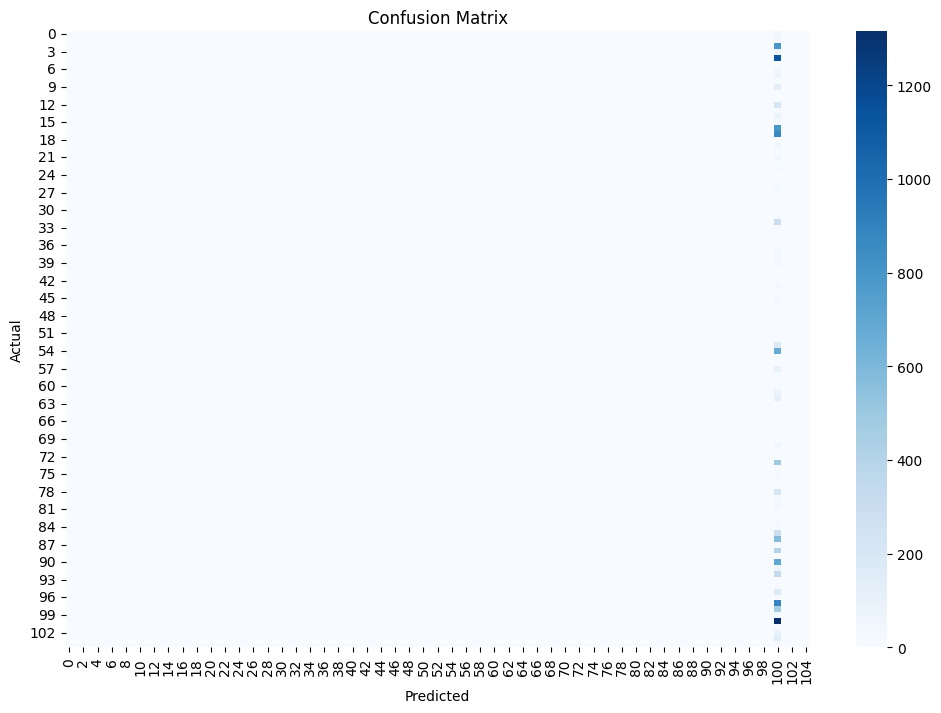

In [59]:
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [63]:
# Encode the y_train and y_test
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)



🟠 XGBoost Accuracy: 0.1418352434428121

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.38      0.06      0.11        48
           1       0.45      0.41      0.43        34
           2       0.17      0.19      0.18       793
           3       0.00      0.00      0.00        82
           4       0.14      0.27      0.19      1133
           5       0.25      0.25      0.25         4
           6       0.50      0.19      0.27        48
           7       0.13      0.03      0.05        61
           8       0.00      0.00      0.00         1
           9       0.07      0.03      0.05       144
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         5
          12       0.13      0.03      0.05       215
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00        82
          15       0.00      0.00      0.00        41
      

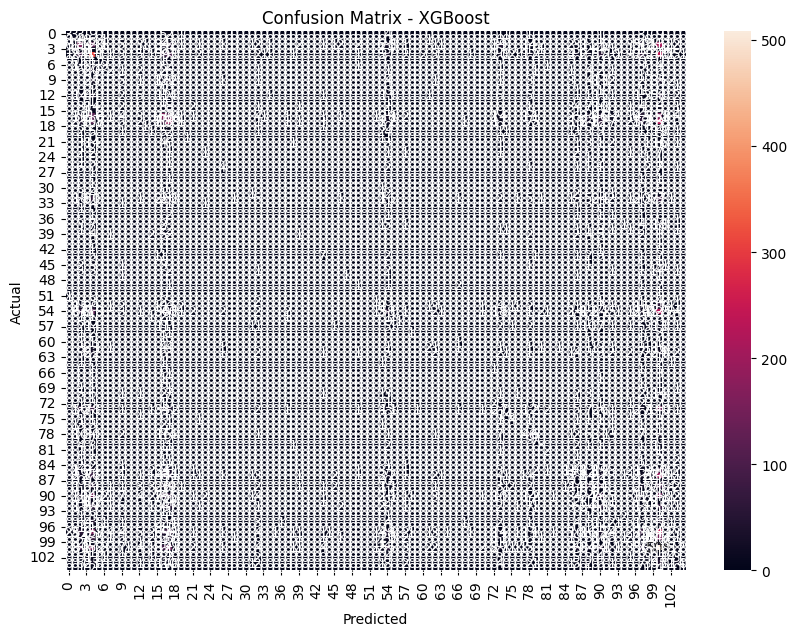

In [66]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler # Import StandardScaler
# Assuming X_train is your original training data
scaler = StandardScaler() # Create a StandardScaler object
X_train_scaled = scaler.fit_transform(X_train) # Scale the training data
X_test_scaled = scaler.transform(X_test) # Scale the test data using the same scaler


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, y_train_encoded)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\n🟠 XGBoost Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print("\nClassification Report (XGBoost):\n", classification_report(y_test_encoded, y_pred_xgb))

# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
plt.figure(figsize=(10,7))
sns.heatmap(cm_xgb, annot=True, fmt='d')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

🌟 Random Forest Accuracy: 0.12368279363125913
🌟 Random Forest Macro F1 Score: 0.07140321827008965

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.11      0.06      0.08        48
           1       0.46      0.53      0.49        34
           2       0.17      0.21      0.19       793
           3       0.00      0.00      0.00        82
           4       0.16      0.21      0.18      1133
           5       0.33      0.25      0.29         4
           6       0.36      0.31      0.33        48
           7       0.04      0.03      0.04        61
           8       0.00      0.00      0.00         1
           9       0.07      0.06      0.06       144
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         5
          12       0.11      0.08      0.09       215
          13       0.00      0.00      0.00         6
          14       0.02      0.01      0.01       

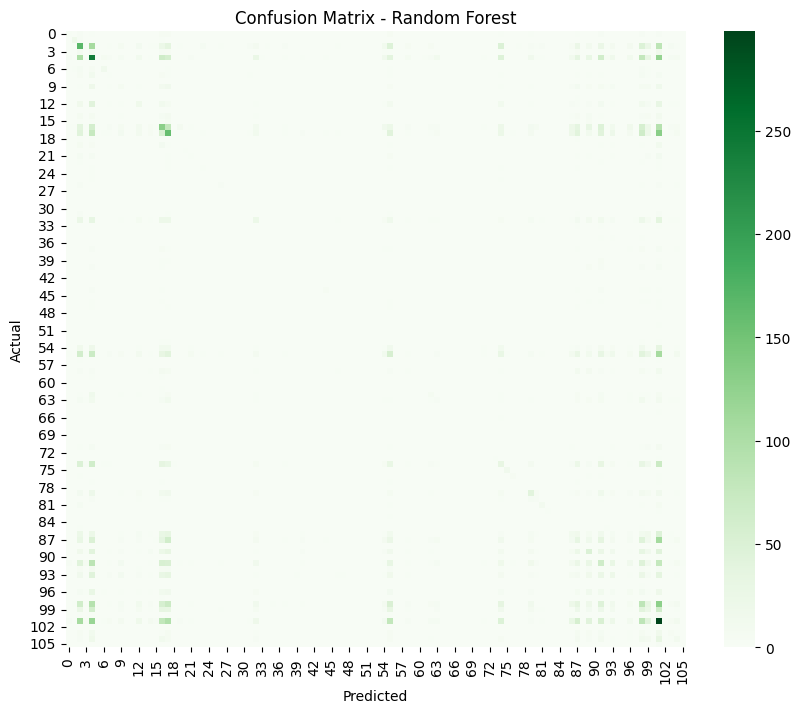

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf_model = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=None,        # allow trees to grow fully
    random_state=42,
    n_jobs=-1              # use all CPU cores
)

# Train the model
rf_model.fit(X_train_scaled, y_train_encoded)

# --------------------------------------------
# 3. Predict on Test Data
# --------------------------------------------

y_pred_rf = rf_model.predict(X_test_scaled)

# --------------------------------------------
# 4. Evaluate the Model
# --------------------------------------------

# Accuracy
print("🌟 Random Forest Accuracy:", accuracy_score(y_test_encoded, y_pred_rf))

# Macro F1 Score (important for many classes)
print("🌟 Random Forest Macro F1 Score:", f1_score(y_test_encoded, y_pred_rf, average='macro'))

# Classification Report
print("\nClassification Report (Random Forest):\n", classification_report(y_test_encoded, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test_encoded, y_pred_rf)

plt.figure(figsize=(10,8))
sns.heatmap(cm_rf, annot=False, cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [68]:
# Create mapping
crime_mapping = {
    'ASSAULT': 'Violent Crime',
    'BATTERY - SIMPLE ASSAULT': 'Violent Crime',
    'ROBBERY': 'Violent Crime',
    'BURGLARY': 'Property Crime',
    'THEFT PLAIN - PETTY ($950 & UNDER)': 'Property Crime',
    'VANDALISM': 'Property Crime',
    'VEHICLE - STOLEN': 'Property Crime',
    'NARCOTICS': 'Drug Crime',
    'DRIVING UNDER INFLUENCE': 'Public Order Crime',
    'DISORDERLY CONDUCT': 'Public Order Crime',
    'WEAPONS POSSESSION/BLADE': 'Public Order Crime',
    # You can expand this list based on your data
}

In [69]:
# Map crime codes
df['Crime_Group'] = df['Crm Cd Desc'].map(crime_mapping)

# Fill unmapped crimes as 'Other Crime'
df['Crime_Group'] = df['Crime_Group'].fillna('Other Crime')

# Check distribution
print(df['Crime_Group'].value_counts())

Crime_Group
Other Crime       42627
Property Crime    14241
Violent Crime      8146
Name: count, dtype: int64


In [70]:
# 4. Feature Selection
# --------------------------------------------

X = df[['LAT', 'LON', 'AREA NAME', 'Hour', 'Weekday']]
y = df['Crime_Group']

In [71]:
# Encode 'AREA NAME'
le_area = LabelEncoder()
X['AREA NAME'] = le_area.fit_transform(X['AREA NAME'])

# Encode target labels
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

In [72]:
print("Number of rows in dataset:", df.shape[0])
print("Unique Crime Groups:", df['Crime_Group'].unique())
print("Crime Group counts:\n", df['Crime_Group'].value_counts())


Number of rows in dataset: 65014
Unique Crime Groups: ['Property Crime' 'Other Crime' 'Violent Crime']
Crime Group counts:
 Crime_Group
Other Crime       42627
Property Crime    14241
Violent Crime      8146
Name: count, dtype: int64


In [73]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print(X.isnull().sum())   # Check if any columns still have NaN


X shape: (65014, 5)
y shape: (65014,)
LAT              1
LON              1
AREA NAME        0
Hour             0
Weekday      65014
dtype: int64


In [74]:
# 5. Train-Test Split
# --------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [75]:
# Fill missing 'Crime_Group' after mapping
df['Crime_Group'] = df['Crime_Group'].fillna('Other Crime')

# Select features and target
X = df[['LAT', 'LON', 'AREA NAME', 'Hour', 'Weekday']]
y = df['Crime_Group']

# Do NOT drop all rows blindly
# (Handle NaN carefully instead)

# Fill missing numeric fields if needed
X['LAT'] = X['LAT'].fillna(X['LAT'].median())
X['LON'] = X['LON'].fillna(X['LON'].median())
X['Hour'] = X['Hour'].fillna(X['Hour'].median())
X['Weekday'] = X['Weekday'].fillna(X['Weekday'].median())

# Drop rows only if Area Name missing
X = X.dropna(subset=['AREA NAME'])
y = y[X.index]


In [76]:
print(X.shape)
print(y.shape)


(65013, 5)
(65013,)


In [77]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
# 7. Train Random Forest
# --------------------------------------------

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

🌟 Random Forest Accuracy: 0.5913250788279628
🌟 Random Forest Macro F1 Score: 0.37178705441912346

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.82      0.74      8526
           1       0.27      0.16      0.20      2848
           2       0.25      0.14      0.18      1629

    accuracy                           0.59     13003
   macro avg       0.40      0.37      0.37     13003
weighted avg       0.53      0.59      0.55     13003



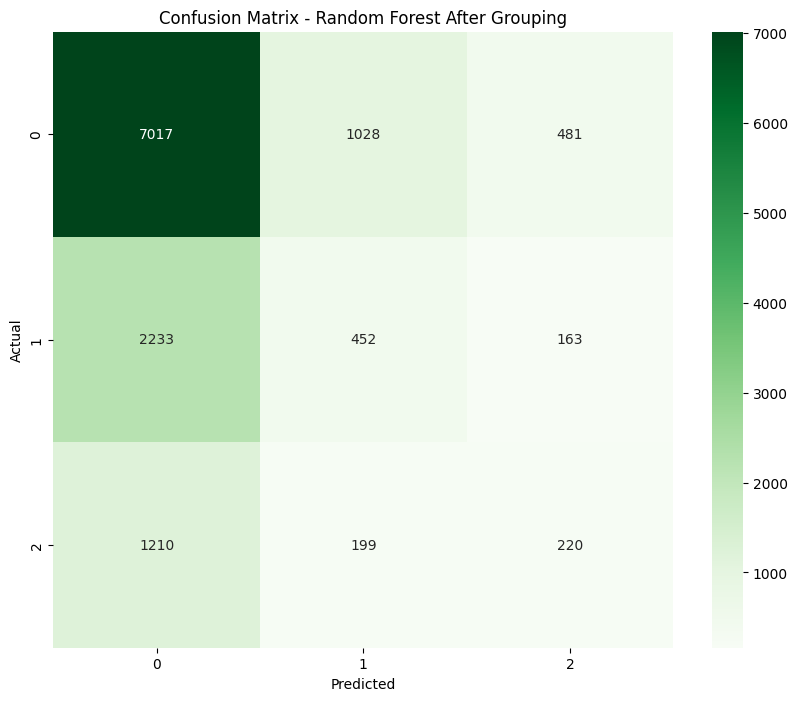

In [79]:
# 8. Evaluate Model
# --------------------------------------------

y_pred_rf = rf_model.predict(X_test_scaled)

# Accuracy
print("🌟 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Macro F1 Score
print("🌟 Random Forest Macro F1 Score:", f1_score(y_test, y_pred_rf, average='macro'))

# Full Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10,8))
sns.heatmap(cm_rf, annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix - Random Forest After Grouping')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [80]:
# Fill missing values in features
X['LAT'] = X['LAT'].fillna(X['LAT'].median())
X['LON'] = X['LON'].fillna(X['LON'].median())
X['Hour'] = X['Hour'].fillna(X['Hour'].median())
X['Weekday'] = X['Weekday'].fillna(X['Weekday'].median())

# If AREA NAME has missing, fill with most frequent
X['AREA NAME'] = X['AREA NAME'].fillna(X['AREA NAME'].mode()[0])

# Now check if anything still missing
print(X.isnull().sum())


LAT              0
LON              0
AREA NAME        0
Hour             0
Weekday      65013
dtype: int64


In [81]:
from sklearn.preprocessing import LabelEncoder
le_area = LabelEncoder()
X['AREA NAME'] = le_area.fit_transform(X['AREA NAME'])

In [82]:
# Double check for NaNs
print("Missing values in X:\n", X.isnull().sum())
print("Missing values in y:", y.isnull().sum())

Missing values in X:
 LAT              0
LON              0
AREA NAME        0
Hour             0
Weekday      65013
dtype: int64
Missing values in y: 0


In [83]:
# 3. Encode Target (Crime Group)
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

In [84]:
# 4. Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [85]:
# 5. Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [87]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
# Check again before scaling
print("Any NaNs in X_train?", pd.DataFrame(X_train).isnull().sum().sum())
print("Any NaNs in X_test?", pd.DataFrame(X_test).isnull().sum().sum())


Any NaNs in X_train? 52010
Any NaNs in X_test? 13003


In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# ... (your previous code for data loading and preprocessing) ...

# Impute missing values using SimpleImputer before scaling
imputer = SimpleImputer(strategy='median')  # or 'mean', 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto', random_state=42)
log_model.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=1000, multi_class='auto', random_state=42)

🔵 Logistic Regression Accuracy: 0.655694839652388

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.66      1.00      0.79      8526
           1       0.00      0.00      0.00      2848
           2       0.00      0.00      0.00      1629

    accuracy                           0.66     13003
   macro avg       0.22      0.33      0.26     13003
weighted avg       0.43      0.66      0.52     13003



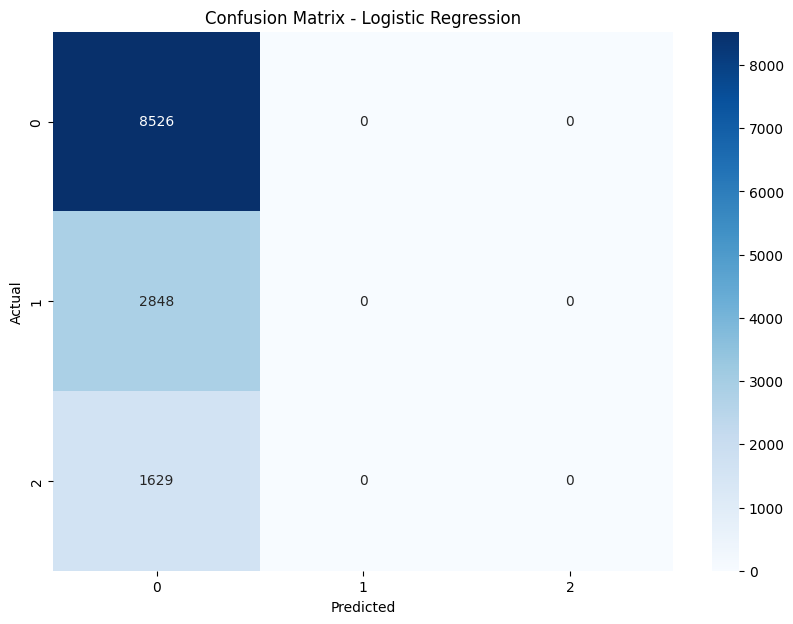

In [90]:
#Predictions and Evaluation
y_pred_log = log_model.predict(X_test_scaled)

# Accuracy
print("🔵 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# Classification Report
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [91]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# 2. Train XGBoost Model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [93]:
# 3. Predict on Test Data
y_pred_xgb = xgb_model.predict(X_test_scaled)


In [94]:
# 4. Evaluate the Model
print("🟠 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

🟠 XGBoost Accuracy: 0.655925555641006

Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.79      8526
           1       0.55      0.00      0.01      2848
           2       0.00      0.00      0.00      1629

    accuracy                           0.66     13003
   macro avg       0.40      0.33      0.27     13003
weighted avg       0.55      0.66      0.52     13003

